## Regularization and Data Augmentation for CNNs

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Normalize pixel values to the range 0-1

In [3]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255




One hot encode the labels

In [4]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

Apply Data Augmentation

In [5]:
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

In [10]:
def create_model():
  # Convolutional Layer1
  model=models.Sequential()
  model.add(layers.Input(shape=(32,32,3)))
  model.add(layers.Conv2D(32,(3,3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32,(3,3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Dropout(0.25))

  # Convolutional Layer2
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64,(3,3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Dropout(0.25))

  # Fully Connected Layers
  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10,activation='softmax'))

  return model


In [11]:
model=create_model()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Train the model using augmented data generator

In [12]:
history=model.fit(
    datagen.flow(X_train,y_train,batch_size=64),
    epochs=20,
    validation_data=(X_test,y_test),
    steps_per_epoch=X_train.shape[0]//64
)

Epoch 1/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 237s 296ms/step - accuracy: 0.3447 - loss: 2.1259 - val_accuracy: 0.5309 - val_loss: 1.3611
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4531 - loss: 1.3132 - val_accuracy: 0.5242 - val_loss: 1.3901
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 221s 282ms/step - accuracy: 0.5412 - loss: 1.2836 - val_accuracy: 0.6028 - val_loss: 1.1407
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5781 - loss: 1.2063 - val_accuracy: 0.5981 - val_loss: 1.1500
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 231s 295ms/step - accuracy: 0.6030 - loss: 1.1178 - val_accuracy: 0.6400 - val_loss: 1.0310
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5938 - loss: 1.1408 - val_accuracy: 0.6341 - val_loss: 1.0486
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 232s 297ms/step - accuracy: 0.6390 - loss: 1.0190 - val_accuracy: 0.6812 - val_loss: 0.9141
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6875 - loss: 1.0

In [13]:
test_loss, test_accuracy=model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.7333 - loss: 0.7657
Test Accuracy: 73.52%


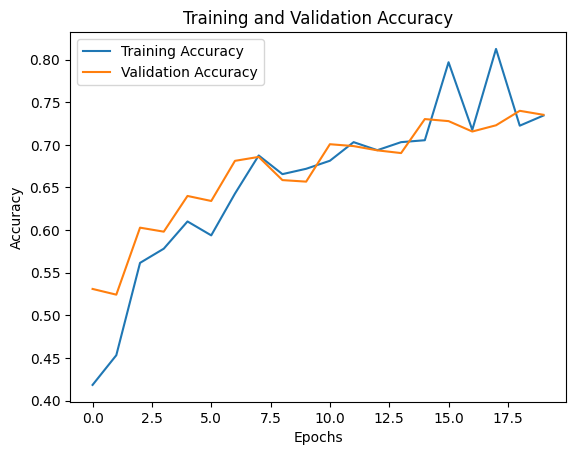

In [14]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

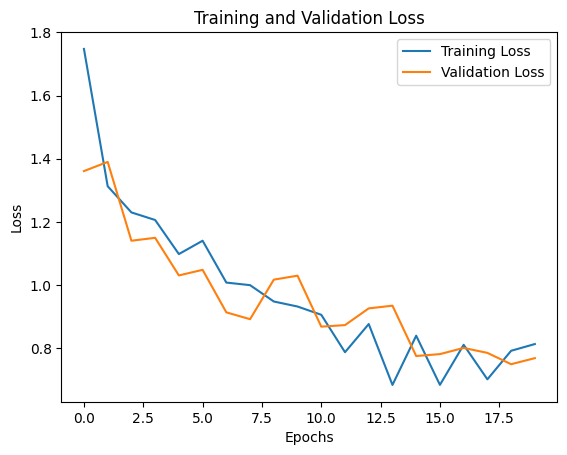

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()